# Exercise Sheet 11
## Exercise 2

### Read in the data and have a look at it

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

data = pd.read_csv('iris.data', sep = ',', header = None)
data = data.rename(columns = {0: 'sepal_length',
                              1: 'sepal_widgth',
                              2: 'petal_length',
                              3: 'petal_widgth',
                              4: 'class',
                                })

### Visualize it using PCA, after finding an appropriate subspace from the eigen values and vectors.

In [4]:
X = data.iloc[:,:4].values
Y = data.iloc[:,4].values
color_map = {
    'Iris-setosa': 'green',
    'Iris-versicolor': 'red',
    'Iris-virginica': 'blue',
}

### Implementing it on our own:


#### deciding how many components: 

assuming Singular value decompositions, since the 150x4 matrix has no eigenvalues nor eigenvectors.

In [5]:
U, S, V = np.linalg.svd(X)
print(S)


[95.95066751 17.72295328  3.46929666  1.87891236]


S is an array 1x4 array with the Singular values, V is a 4x4 matrix with the right singular vectors and U is a 150x150 matrix with the left singular vectors.

Loosely spoken, the Singular values tell us how much information is in each of the columns of the matrix U.

In this case, the first transformed componend is with 95.95 significantly better than the others, yet 17.7 is still way better than 3.4.

Therefore and **appropriate subspace would probably be 2**, although one could even argue to go into one dimension only. (That would only make sense for enourmous dataset, where the further processing takes ages, and dimensionality reduciton would yield massive performance boosts)

### Test only the first component (K=1):

In [6]:

U_1 = U[:, :1].copy()
U_1 *= S[:1]

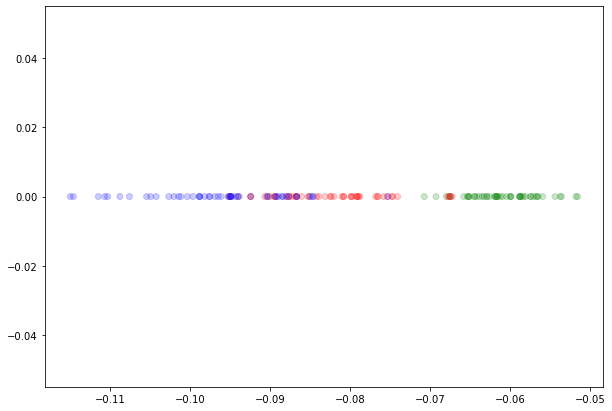

In [7]:

fig, ax = plt.subplots(1,1,figsize = (10,7))
ax.scatter(U[:,0], np.zeros(150),c = [color_map[i] for i in Y], alpha = 0.2)

Here we can see visually, that the first copmonent is already a very good discriminator for the three classes. Lets see what happens when we increase the dimension by one.

### Test for the first two components (K=2):

In [8]:
U_2 = U[:, :2].copy()
U_2 *= S[:2]

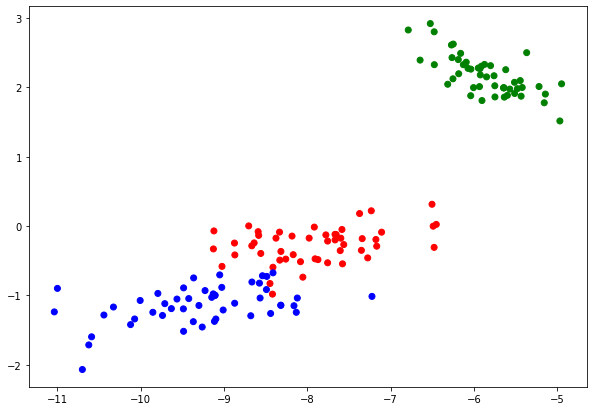

In [9]:
fig, ax = plt.subplots(1,1,figsize = (10,7))
ax.scatter(U_2[:,0], U_2[:,1] ,c = [color_map[i] for i in Y])

here he can see an even better separation of the three classes. Lastly lets look at the threedimensional Case.

### Test only the first three components (K=3):

In [10]:
U_3 = U[:, :3].copy()
U_3 *= S[:3]

C:\Users\SAFIAL~1\AppData\Local\Temp/ipykernel_14196/3603218625.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


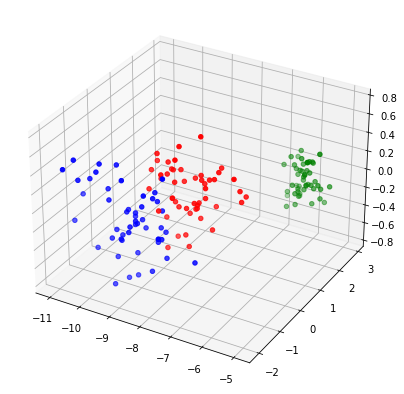

In [11]:
fig = plt.figure(figsize = (10,7))
ax = fig.gca(projection='3d')
ax.scatter(U_3[:,0], U_3[:,1], U_3[:,2] ,c = [color_map[i] for i in Y])

A third dension doesnt really add value for the classification task. The discrimnation of not better as in the 2D Case.

### Using the SciPy library: (out of curiosity and comparison)

In [12]:
pca = PCA(n_components = 2).fit(X)
print(pca.transform(X)[:5])
print(U_2[:5])

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]]
[[-5.91220352  2.30344211]
 [-5.57207573  1.97383104]
 [-5.4464847   2.09653267]
 [-5.43601924  1.87168085]
 [-5.87506555  2.32934799]]


Text(0.5, 1.0, "Scipy's Implementation")

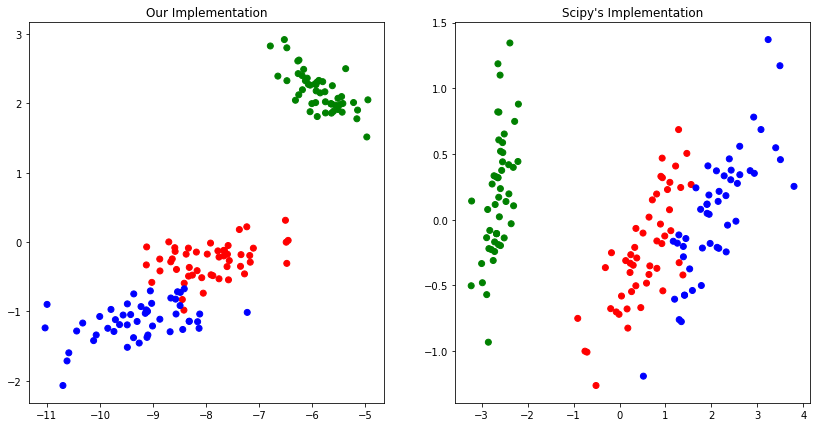

In [13]:
fig, ax = plt.subplots(1,2,figsize = (14,7))
ax[0].scatter(U_2[:,0], U_2[:,1] ,c = [color_map[i] for i in Y])
ax[1].scatter(pca.transform(X)[:,0], pca.transform(X)[:,1] ,c = [color_map[i] for i in Y])
ax[0].set_title('Our Implementation')
ax[1].set_title('Scipy\'s Implementation')

We can see, that these values divere, despite clear clusteres emerging in both versions. Reason for that is, that in the scipy funciton, the features get centered around 0.
When we also do this, we should get the same result.

In [14]:
mean_ = np.mean(X, axis=0)
X_norm = X - mean_
U_2_norm, S_2_norm, V_2_norm  = np.linalg.svd(X_norm)
U_2_norm = U_2_norm[:, :2]
U_2_norm *= S_2_norm[:2]
print(pca.transform(X)[:5])
print(U_2_norm[:5])


[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]]
[[-2.68420713 -0.32660731]
 [-2.71539062  0.16955685]
 [-2.88981954  0.13734561]
 [-2.7464372   0.31112432]
 [-2.72859298 -0.33392456]]


Interestingly, the second feature is multiplied by -1, compared to the componets, we calculated before.

Text(0.5, 1.0, "Scipy's Implementation")

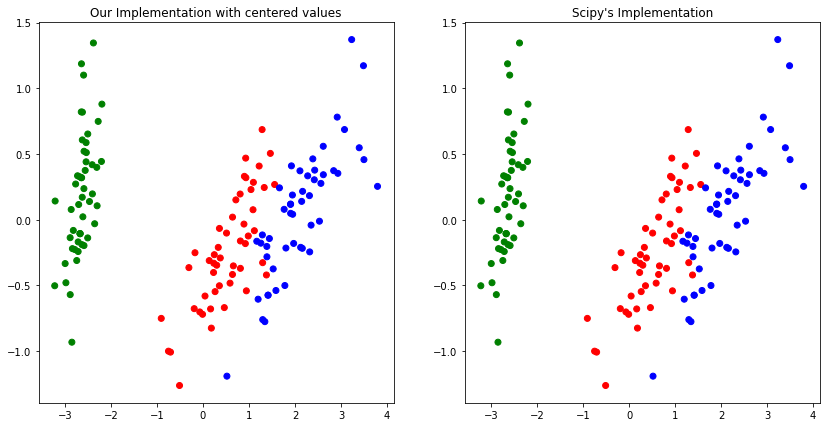

In [15]:
fig, ax = plt.subplots(1,2,figsize = (14,7))
ax[0].scatter(U_2_norm[:,0], -1 * U_2_norm[:,1] ,c = [color_map[i] for i in Y])
ax[1].scatter(pca.transform(X)[:,0], pca.transform(X)[:,1] ,c = [color_map[i] for i in Y])
ax[0].set_title('Our Implementation with centered values')
ax[1].set_title('Scipy\'s Implementation')


Now the values are aligned, which is what we assumed. Also, the discrimitation of the three casses with uncentered data is just as good as with centered data, at least for this example.

It is likely that this is not the general Case, especially with Dimensions larger than 10.